In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy as sp
import statsmodels.api as sm

In [2]:
simuDataFolder = '../SimulationCode/simulations/CSVs/'

In [19]:
allModelNames = ['1LR', '1LR_attention', 'exemplar', 'exemplar_weights', 
                 'exemplar_participantParams',
                 'GP5008010', 'GP50080100', 'GP1008010'
                ]
paraNames = {
    '1LR': ['alpha', 'sigma'],
    '1LR_attention': ['alpha', 'sigma', 'inv_temp'],
    'exemplar': ['mem_trials', 'sigma'],
    'exemplar_weights': ['mem_decay', 'sim_weight', 'sigma'],

    'exemplar_participantParams': ['mem_decay', 'sim_weight', 'sigma'],
    
    'GP': ['lambda', 'sigma_f', 'sigma_e'],
    'GP_noisy': ['lambda', 'sigma_f', 'sigma_e'],
    'GP_sigma': ['lambda', 'sigma_f', 'sigma_e', 'sigma'],
    'GP5008010': ['lambda', 'sigma_f', 'sigma_e'],
    'GP50080100': ['lambda', 'sigma_f', 'sigma_e'],
    'GP1008010': ['lambda', 'sigma_f', 'sigma_e'],
}

cols = ['sub', 'iTrial', 'response'] + ['bars' + str(i+1) for i in range(5)] + ['correct_response']

In [20]:
simudata = dict.fromkeys(allModelNames)
for model in allModelNames:
    if model == 'exemplar_participantParams':
        simudata[model] = pd.read_csv(simuDataFolder+model+'.csv', names=cols+paraNames[model])
    else:
        simudata[model] = pd.read_csv(simuDataFolder+model+'_simulatedData.csv', names=cols+paraNames[model])

### proportion of agents with significant regression weights

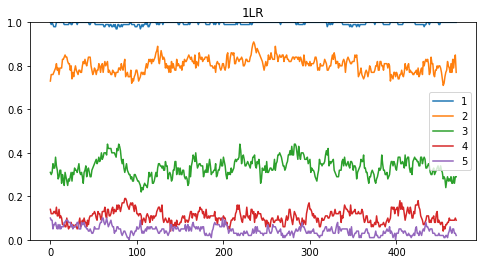

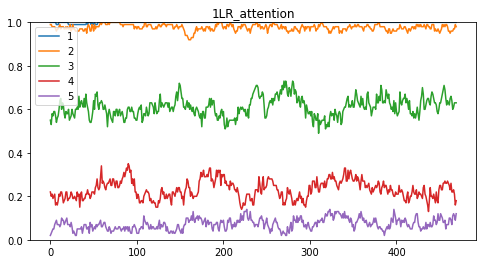

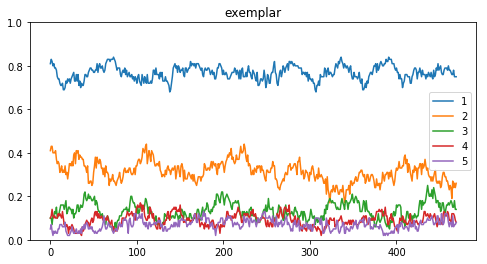

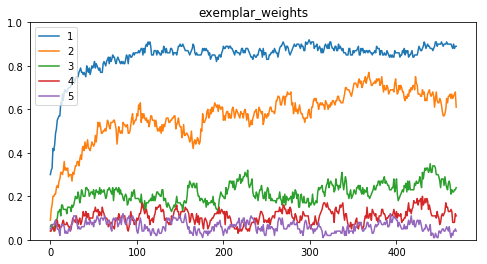

In [11]:
NTrials = 500
window = 30
beta = [0.55, 0.25, 0.12, 0.06, 0.02]

for model in modelNames:
    data = simudata[model]
    
    cols = ['bars'+str(i+1) for i in range(5)]
    
    # plot maximum 100 simuated agents
    subList = data['sub'].unique()
    if len(subList) > 100:
        subList = subList[:100]
    NSub = len(subList)
    
    pMat = np.empty((NSub, NTrials-window, 5))
    pMat[:] = np.nan
    
    for iSub in range(NSub):
        dataSub = data[(data['sub']==iSub+1)].copy().reset_index(drop=True)
        for i in np.arange(NTrials-window):
            dataWindow = dataSub.iloc[i:i+window]
            X = dataWindow[cols].values
            y = dataWindow['response'].values
            X = sm.add_constant(X)
            mod = sm.OLS(y, X)
            res = mod.fit()
            pMat[iSub, i, :] = res.pvalues[1:]
            
    fig, ax = plt.subplots(1,1,figsize=(8,4))
    for iBar in range(5):
        ax.plot(np.nanmean(pMat[:,:,iBar]<0.05,axis=0), label=iBar+1)
    ax.legend()
    ax.set_ylim([0,1])
    ax.set_title(model)

### regression weight estimates (Kate's models)

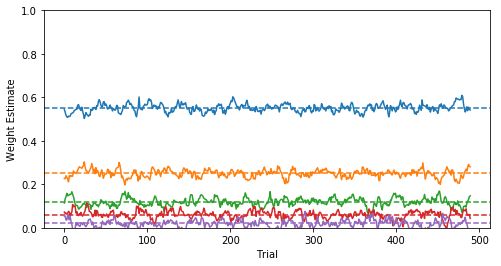

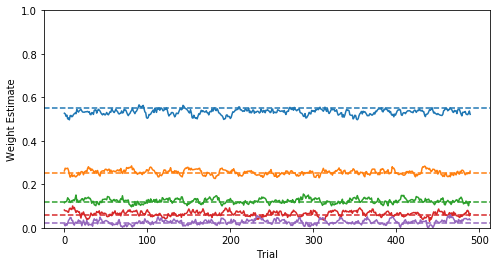

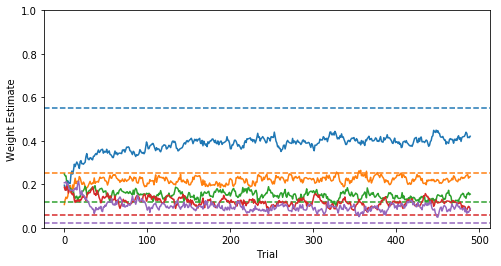

In [12]:
modelNames = ['1LR', '1LR_attention', 'exemplar_weights']

coef = dict.fromkeys(modelNames)

import statsmodels.api as sm

NSub = 100
NTrials = 500
window = 10
beta = [0.55, 0.25, 0.12, 0.06, 0.02]

for model in modelNames:
    data = simudata[model]
    
    cols = ['bars'+str(i+1) for i in range(5)]
    coef[model] = np.empty((NSub, NTrials-window, 6))
    coef[model][:] = np.nan
    for iSub in range(NSub):
        dataSub = data[(data['sub']==iSub+1)].copy().reset_index(drop=True)
        for i in np.arange(NTrials-window):
            dataWindow = dataSub.iloc[i:i+window]
            X = dataWindow[cols].values
            y = dataWindow['response'].values
#             X = sm.add_constant(X)
            mod = sm.OLS(y, X)
            res = mod.fit()
#             coef[model][iSub, i, -1] = res.params[0]/100
            coef[model][iSub, i, 0:5] = res.params#[1:]
    fig, ax = plt.subplots(1,1,figsize=(8,4))
    for iBar in range(5):
        ax.plot(np.mean(coef[model][:, :, iBar],axis=0), color='C'+str(iBar))
        ax.axhline(y=beta[iBar], linestyle='--', color='C'+str(iBar))
    ax.set_ylim([0,1])
    ax.set_ylabel('Weight Estimate')
    ax.set_xlabel('Trial')
    

### GP model

In [ ]:
models = ['GP5008010', 'GP50080100', 'GP1008010']

coef = dict.fromkeys(modelNames)

NTrials = 500
window = 30
beta = [0.55, 0.25, 0.12, 0.06, 0.02]

for model in models:

    data = simudata[model]

    cols = ['bars'+str(i+1) for i in range(5)]

    subList = data['sub'].unique()
    NSub = len(subList)

    coef[model] = np.empty((NSub, NTrials-window, 6))
    coef[model][:] = np.nan

    for iSub, sub in enumerate(subList):
        dataSub = data[(data['sub']==sub)].copy().reset_index(drop=True)
        for i in np.arange(NTrials-window):
            dataWindow = dataSub.iloc[i:i+window]
            X = dataWindow[cols].values
            y = dataWindow['response'].values
#             X = sm.add_constant(X)
            mod = sm.OLS(y, X)
            res = mod.fit()
#             coef[model][iSub, i, -1] = res.params[0]/100
            coef[model][iSub, i, 0:5] = res.params#[1:]
    

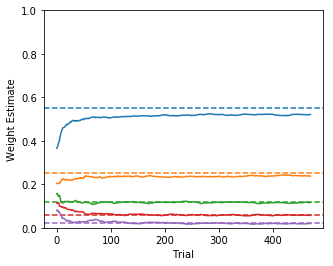

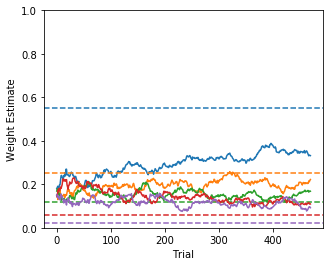

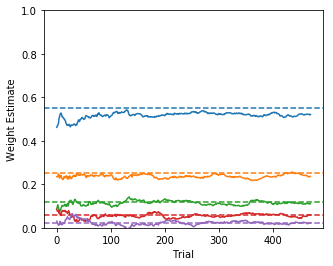

In [25]:
for model in models:
    fig, ax = plt.subplots(1,1,figsize=(5,4))
    for iBar in range(5):
        ax.plot(np.mean(coef[model][:, :, iBar],axis=0), color='C'+str(iBar))
        ax.axhline(y=beta[iBar], linestyle='--', color='C'+str(iBar))
    ax.set_ylim([0,1])
    ax.set_ylabel('Weight Estimate')
    ax.set_xlabel('Trial')

### exemplar_participantParams

In [28]:
## import statsmodels.api as sm

NSub = 41
NTrials = 500
window = 10
beta = [0.55, 0.25, 0.12, 0.06, 0.02]

realbeta = [0.12, 0.02, 0.55, 0.25, 0.06]

model = 'exemplar_participantParams'

data = simudata[model]

cols = ['bars'+str(i+1) for i in range(5)]
coef = np.empty((NSub, NTrials-window, 6))
coef[:] = np.nan
for iSub in range(NSub):
    dataSub = data[(data['sub']==iSub+1)].copy().reset_index(drop=True)
    for i in np.arange(NTrials-window):
        dataWindow = dataSub.iloc[i:i+window]
        X = dataWindow[cols].values
        y = dataWindow['response'].values
        X = sm.add_constant(X)
        mod = sm.OLS(y, X)
        res = mod.fit()
        coef[iSub, i, -1] = res.params[0]/100
        coef[iSub, i, 0:-1] = res.params[1:]



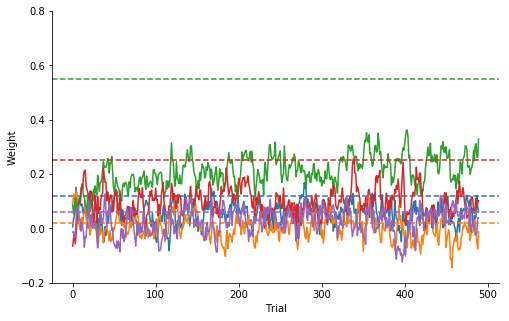

In [36]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
for iBar, bar in enumerate([2,4,0,1,3]):
    ax.plot(np.mean(coef[:, :, bar],axis=0), color='C'+str(iBar))
    ax.axhline(y=beta[bar], linestyle='--', color='C'+str(iBar))
ax.set_ylim([-0.2,0.8])
ax.set(xlabel='Trial',ylabel='Weight')
import seaborn as sns
sns.despine()